In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
from IPython.display import display, Math, Latex
from __future__ import print_function
from __future__ import division

# Non-Linear Signal Processing: Exercise 9

This exercise in application of kernel machines is based on C. M. Bishop: {\em Pattern Recognition
and Machine Learning}, section~6.1,6.2,6.4.1-6.4.3.

Print and comment on the figures produced by the software as outlined below at the Checkpoints

## The kernel matrix
A training set of $N$ data points $D=\{(t_1,\mathbf x_1),(t_2,\mathbf x_2),...,(t_N,\mathbf x_N)\}$ is
given and let the dimension of input space be $d$. Assume that we want to adapt a linear model with weights $\mathbf w$ based on least squares, i.e., minimizing
\begin{equation}
E(\mathbf w) = \sum_{n =1}^{N}( t_n - \sum_{j=0}^{d} w_j x_{j,n} )^2,
\end{equation}
with $x_{0,n}=1$ for all $n$. Assume further that the dimension of input space exceeds the sample size, $d > N$. In this case it is useful to write the $d+1$-dimensional weight vector as a sum of two orthogonal components with respect to the linear subspace spanned by the data vectors,
\begin{equation}
\mathbf w = \mathbf w_{\small \perp} + \mathbf w_{\small \parallel},
\end{equation}
where $\mathbf w_{\small \parallel}$ is a vector in the subspace spanned by the input data points, while $\mathbf w_{\small \perp}$ is in the orthogonal subspace. In other words
$\mathbf w_{\small \parallel}$ can be written as the linear combination
\begin{equation}
 \mathbf w_{\small \parallel} = \sum_{n=1}^N a_n \mathbf x_n,
\end{equation}
while $\mathbf w_{\small \perp}$ is orthogonal to all data points: $\mathbf w_{\small \perp}^{\top}\mathbf x_n =0$.   The sum of squared errors can now be rewritten as
\begin{eqnarray}
E(\mathbf w) &=& \sum_{n =1}^{N}( t_n - \mathbf w^{\top}\mathbf x_n )^2 = \sum_{n =1}^{N}( t_n - \mathbf w_{\small \parallel}^{\top}\mathbf x_n )^2 \\ \nonumber
 &=& \sum_{n =1}^{N}( t_n - \sum_{m=1}^N a_m \mathbf x_m^{\top}\mathbf x_n )^2 = \sum_{n =1}^{N} ( t_n - \sum_{m=1}^N a_m K_{m,n})^2 =\sum_{n =1}^{N}( t_n - (\mathbf a^{\top} \mathbf K)_n )^2.
\end{eqnarray}
where we introduced the notation $(\mathbf K)_{m,n} = K_{m,n}=\mathbf x_m^{\top}\mathbf x_n$ for the \emph{kernel} matrix of inner products among all input vectors.

More generally we see that for a general feature mapping $\mathbf x \mapsto \mathbf \phi(\mathbf x)$, we can represent a linear model on feature vectors in terms of their inner products
\begin{eqnarray}
E(\mathbf w) &=& \sum_{n =1}^{N}( t_n - \mathbf w^{\top}\mathbf \phi(\mathbf x_n) )^2 =\sum_{n =1}^{N}( t_n - (\mathbf a^{\top} \mathbf K)_n )^2.
\end{eqnarray}
Here the kernel matrix is $(\mathbf K)_{m,n} = K_{m,n}=\mathbf \phi(\mathbf x_m)^{\top}\mathbf \phi(\mathbf x_n)$. Conversely, we may define feature vectors
\emph{implicitly} through an $N \times N$ inner product matrix $\mathbf K$. An example of this is the Gaussian kernel which is widely used in applications,
\begin{equation}
 K_{m,n} = e^{ -\| \mathbf x_m -\mathbf x_n \|^2/2\sigma^2 } \ ,
\end{equation}
with width parameter $\sigma^2$.

The general idea of kernel methods is to use the kernel matrix to encode input similarity, hence, assuming that targets are similar $\mathbf t_m \approx \mathbf t_n$ when inputs are similar ($\mathbf x_m \approx \mathbf x_n$), hence, when $K_{m,n}$ has a high value.

### Checkpoint 10.1
Here we analyze the structure of the kernel matrix. First let us inspect the gaussian kernel matrix for a simple two cluster simulated data set in $d=2$.
Run the cells below and discuss the structure of kernel matrix for these simple simulated data sets. How does the width of the Gaussian kernel affect the kernel matrix? Imagine the kernel matrix columns as new "pseudo-features", how well do they separate classes?
Next we investigate the kernel matrix for the case of the sunspot data. Run script {\tt main10b.m} to illustrate the kernel matrix for simple case of 2-dimensional history $d = 2$. Explain the kernel matrix used for predicting targets for test data. Explain the patterns you see in the training and test kernel matrices and relate them to the sunspot time series.


In [3]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
def get_data(width):
    N1 = 50
    N2 = 50
    centers = np.array([1,-1,-1,1]).reshape(2,2)
    train1 = centers[:,0][:,None] + width*np.random.randn(2,N1)
    train2 = centers[:,1][:,None] + width*np.random.randn(2,N2)
    train = np.c_[train1,train2].T
    return train, train1, train2

In [5]:
def gp_dist(x1,x2):
    assert x1.shape[0] > x1.shape[1], "Shape must be (n,d)"
    sum_of_squares1 = (x1**2).sum(1)
    sum_of_squares2 = (x2**2).sum(1)
    return -2*np.dot(x1,x2.T) + sum_of_squares1[:,None] + sum_of_squares2

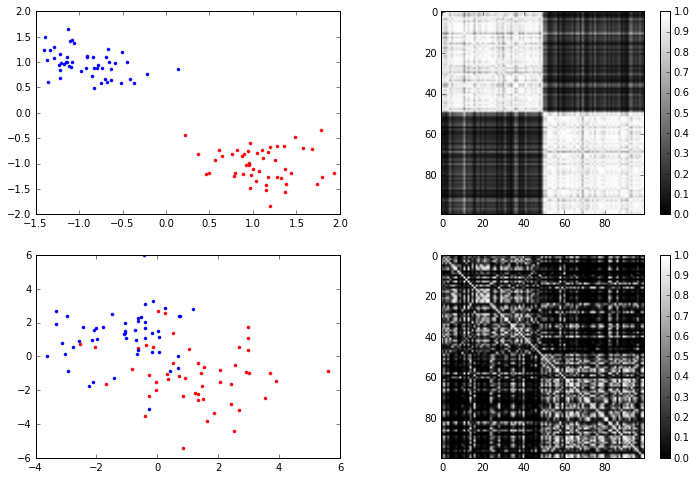

In [6]:
sig1 = 1.5
sig2 = sig1**2

train, train1, train2 = get_data(np.sqrt(0.1))
dist = gp_dist(train,train)
K = np.exp(-dist/(2*sig2))

plt.subplot(221)
plt.plot(*train1,'r.')
plt.plot(*train2,'b.')
plt.subplot(222)
plt.imshow(K,interpolation=None,cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.subplot(223)

train, train1, train2 = get_data(np.sqrt(2))
dist = gp_dist(train,train)
K = np.exp(-dist/(2*sig2))

plt.plot(*train1,'r.')
plt.plot(*train2,'b.')
plt.subplot(224)
plt.imshow(K,interpolation=None,cmap='gray',vmin=0,vmax=1)
plt.colorbar();

In [7]:
d = 2
S = np.fromfile('sp.dat',sep='\t')
year, S = S.reshape(-1,2).T
last_train = 221-d
N = S.shape[0]-d
T = S[d:]
X = np.array([S[i:N+i] for i in range(d)]).T
#X = np.c_[np.ones(N,),X]
Xtrain = X[:last_train,:]
Xtest = X[last_train:,:]
Ttrain = T[:last_train]
Ttest = T[last_train:]
var = T.var(ddof=1)

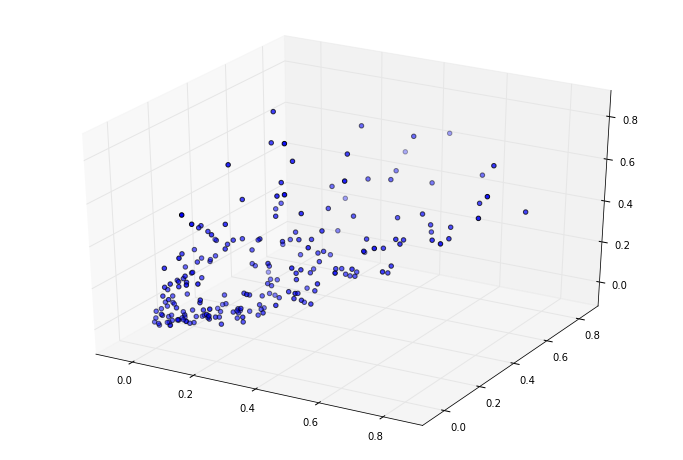

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*Xtrain.T,Ttrain.T,c='b',marker='o');

In [9]:
sig2 = 1
dist_train = gp_dist(Xtrain,Xtrain)
Ktrain = K = np.exp(-dist_train/(2*sig2))
dist_train_test = gp_dist(Xtrain,Xtest)
Ktrain_test = K = np.exp(-dist_train_test/(2*sig2))

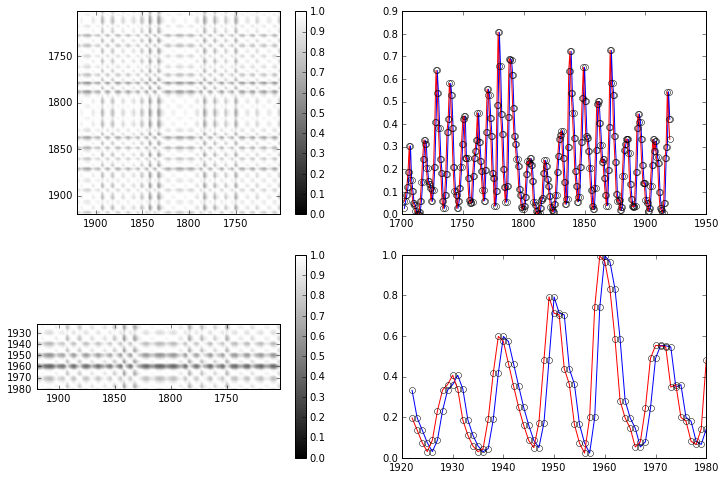

In [10]:
Ntrain = Xtrain.shape[0]
Ntest = Xtest.shape[0]
years = 1700+d+np.arange(Ntrain)
years_test = 1920+d+np.arange(Ntest)
        
plt.subplot(221)
plt.imshow(Ktrain,interpolation=None,cmap='gray',vmin=0,vmax=1,extent=[years[-1],years[0],years[-1],years[0]])
plt.colorbar()
plt.subplot(222)
plt.plot(years,Xtrain[:,0],'b-',marker='o',mfc='none')
plt.plot(years,Xtrain[:,1],'r-',marker='o',mfc='none')
plt.subplot(223)
plt.imshow(Ktrain_test.T,interpolation=None,cmap='gray',vmin=0,vmax=1,extent=[years[-1],years[0],years_test[-1],years_test[0]])
plt.colorbar()
plt.subplot(224)
plt.plot(years_test,Xtest[:,0],'b-',marker='o',mfc='none')
plt.plot(years_test,Xtest[:,1],'r-',marker='o',mfc='none');

## Gaussian process priors for function approximation
The Gaussian process implements the relation $(\mathbf x_m \approx \mathbf x_n) \Rightarrow (\mathbf t_m \approx \mathbf t_n)$ in a probabilistic setting. In particular, for function approximation, we assume that the target function $y(\mathbf x)$ values follow a multivariate normal distribution with the kernel $\mathbf K$ matrix as covariance matrix. For a sample of $N$ points this amounts to
\begin{equation}
{\rm cov}(y_1,...,y_N) = \mathbf K, \ \ \ p(\mathbf y|\mathbf K) = \frac{1}{|2\pi \mathbf K|^{\small \frac{1}{2}}} \exp( -{\textstyle \frac{1}{ 2}}\mathbf y^{\top} \mathbf K^{-1}\mathbf y).
\end{equation}
To model an additive noise process we let the observed targets  be given as $t(\mathbf x) = y(\mathbf x) + \epsilon $, with $\epsilon$ being zero mean, Gaussian noise, with variance $\beta^{-1}$. Assuming that noise and inputs are independent, the covariance matrix between a set of targets becomes the sum of covariances:  ${\rm cov}(t_1,...,t_N) \equiv \mathbf C = \mathbf K + \beta^{-1}\mathbf I$.

In machine learning we are given training and test sets and we are interested in the predictive distribution of the test targets given training data and the
$(N_{\rm test}+N_{\rm train})\times(N_{\rm test}+N_{\rm train})$ kernel matrix $\mathbf C_{\rm train+test}$ measuring the similarity between all training and test data
\begin{equation}
 p(\mathbf t_{\rm test}|\mathbf t_{\rm train},\mathbf C_{\rm train + test}) = \frac{p(\mathbf t_{\rm test},\mathbf t_{\rm train}|\mathbf C_{\rm train + test})}{p(\mathbf t_{\rm train}|\mathbf C_{\rm train})}.
 \end{equation}
The predictive distribution is also multivariate Gaussian with mean $\mathbf \mu_{{\rm test}|{\rm train}}$ and covariance matrix $\mathbf C_{{\rm test}|{\rm train}}$ given by
\begin{eqnarray}
\mathbf \mu_{{\rm test}|{\rm train}} &=& \mathbf C_{{\rm test},{\rm train}}\mathbf C_{\rm train}^{-1}\mathbf t_{\rm train} \\
\mathbf C_{{\rm test}|{\rm train}} &=& \mathbf C_{\rm test} - \mathbf C_{{\rm test},{\rm train}}\mathbf C_{\rm train}^{-1}\mathbf C_{{\rm train},{\rm test}} \end{eqnarray}
following the rules for conditioning in the Gaussian distribution (Bishop Appendix B eq.\ (B.58-B.60), or the Matrix Cookbook eq.\ (331-332)).
Here $\mathbf C_{{\rm test},{\rm train}}$ is the  $N_{\rm test}\times N_{\rm train}$ is the sub-matrix of  $\mathbf C_{\rm train+test}$ connecting test and training inputs.

The maximum posterior prediction of a test target is  $\hat{t}_m =(\mathbf \mu_{{\rm test}|{\rm train}})_m$.
The probabilistic representation of the Gaussian process allows us to infer uncertainties for the predictions as well. Using the posterior covariance in eq.\
(\ref{postcov}) we obtain the estimate
\begin{equation}
{\rm std}(t_m)   =\sqrt{ (\mathbf C_{{\rm test}|{\rm train}})_{m,m}} = \sqrt{(\mathbf C_{\rm test})_{m,m} - (\mathbf C_{{\rm test},{\rm train}}\mathbf C_{\rm train}^{-1}\mathbf C_{{\rm train},{\rm test}})_{m,m} }
\end{equation}

### Checkpoint 10.2
We apply a simple Gaussian process (GP) model to the prediction of sunspots. Run the cells below to optimize the two parameters ($\beta, \sigma^2$)
of the kernel given by\\ $(\mathbf C)_{m,n} = e^{ -\| \mathbf x_m -\mathbf x_n \|^2/2\sigma^2 } + \beta^{-1}\delta_{n,m}$. Explain the relation between the conditional
mean in eq.\ (\ref{conmean}) above and the test set predictions. How do we optimize parameters?. What is the difference between the two estimates of the test data in figure 2 (green and blue)?.
How well does a GP with a simple Gaussian kernel work? Comment on the quality of the posterior uncertainty estimate, cf.\ eq.\ (\ref{postcov}).

In [11]:
d = 5
S = np.fromfile('sp.dat',sep='\t')
year, S = S.reshape(-1,2).T
last_train = 221-d
N = S.shape[0]-d
T = S[d:]
X = np.array([S[i:N+i] for i in range(d)]).T
#X = np.c_[np.ones(N,),X]
Xtrain = X[:last_train,:]
Xtest = X[last_train:,:]
Ttrain = T[:last_train]
Ttest = T[last_train:]
var = T.var(ddof=1)

In [12]:
def gp_loglik(test_dist,test_t,test_train_dist,train_dist,train_t,sig2,beta):
    train_N=train_dist.shape[0]
    test_N=test_dist.shape[0]
    A=np.exp(-train_dist/(2*sig2))+(1/beta)*np.eye(train_N)
    B=np.exp(-test_dist/(2*sig2))+(1/beta)*np.eye(test_N)
    C=np.exp(-test_train_dist/(2*sig2))
    Q=np.dot(C,np.linalg.pinv(A))
    Btt=B-np.dot(Q,C.T)
    pred_test_t=np.dot(Q,train_t)
    gplog_test=-0.5*np.log(np.linalg.det(Btt)) -0.5*np.dot((test_t-pred_test_t).T,np.dot(np.linalg.pinv(Btt),(test_t-pred_test_t)))
    std_pred_test_t=np.sqrt(np.abs(np.diag(Btt)))
    return gplog_test,pred_test_t,std_pred_test_t

In [13]:
Ntest=Ttest.shape[0]
Nsig2=20
Nbeta=20
beta_max=1
beta_min=500
sig2_max=2
sig2_min=0.01
beta_array=np.linspace(beta_min,beta_max,Nbeta)
sig2_array=np.linspace(sig2_min,sig2_max,Nsig2)
train_dist=gp_dist(Xtrain,Xtrain)
test_train_dist=gp_dist(Xtest,Xtrain)
test_dist=gp_dist(Xtest,Xtest)
best_ever=-np.inf
best_ls=np.inf
gplog=np.zeros((Nsig2,Nbeta))
gpls=np.zeros((Nsig2,Nbeta))

In [14]:
# grid search
for gg in range(Nsig2):
    for ss in range(Nbeta):
        sig2=sig2_array[gg]
        beta=beta_array[ss]
        gplog_test,pred_test_t,std_pred_test_t=gp_loglik(test_dist,Ttest,test_train_dist,train_dist,Ttrain,sig2,beta)
        gplog[gg,ss]=gplog_test
        if gplog_test>best_ever:
            best_ever=gplog_test
            best_pred=pred_test_t
            best_std_pred=std_pred_test_t
            best_beta=beta
            best_sig2=sig2
        ls=((pred_test_t - Ttest)**2).mean()/var
        gpls[gg,ss]=ls
        if ls < best_ls:
            best_ls=ls
            best_pred_ls=pred_test_t
            best_beta_ls=beta
            best_sig2_ls=sig2

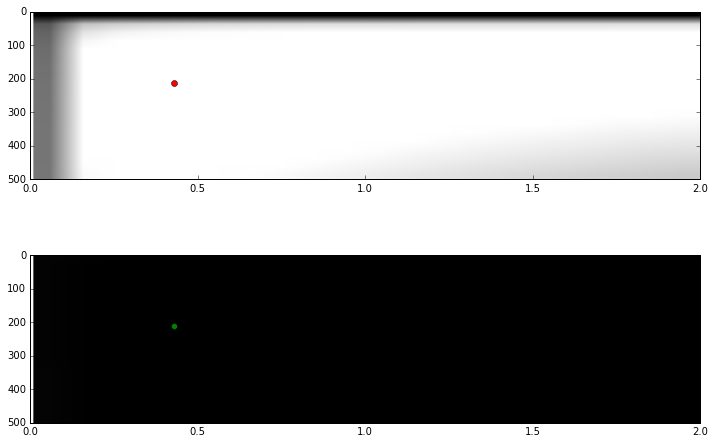

In [15]:
plt.subplot(211)
plt.imshow(gplog.T,cmap='gray',origin='lower',aspect=.001,vmin=0,vmax=100,extent=[sig2_array[0],sig2_array[-1],beta_array[0],beta_array[-1]])
plt.plot(best_sig2,best_beta,'ro')
plt.subplot(212)
plt.imshow(gpls.T,cmap='gray',origin='lower',aspect=.001,vmin=0,vmax=100,extent=[sig2_array[0],sig2_array[-1],beta_array[0],beta_array[-1]])
plt.plot(best_sig2,best_beta,'go');

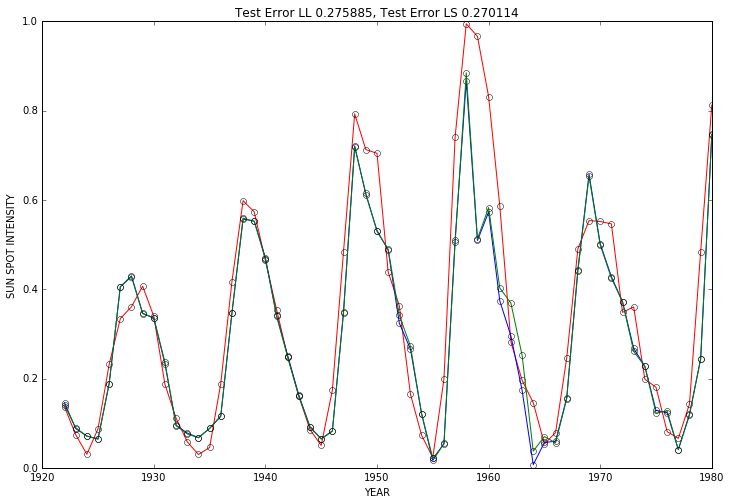

In [16]:
plt.plot(years_test,Ttest,'r-',marker='o',mfc='none')
plt.plot(years_test,best_pred,'b-',marker='o',mfc='none')
plt.plot(years_test,best_pred_ls,'g-',marker='o',mfc='none')
plt.title('Test Error LL %f, Test Error LS %f' %(((best_pred-Ttest)**2).mean()/var,((best_pred_ls-Ttest)**2).mean()/var))
plt.xlabel('YEAR')
plt.ylabel('SUN SPOT INTENSITY');

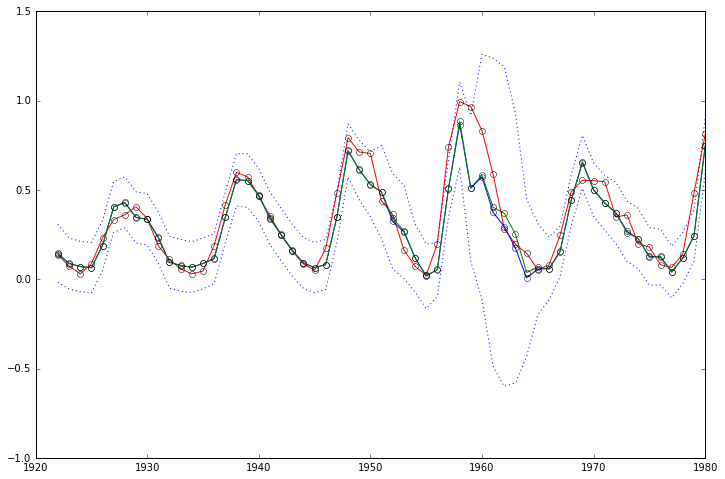

In [19]:
plt.plot(years_test,Ttest,'r-',marker='o',mfc='none')
plt.plot(years_test,best_pred,'b-',marker='o',mfc='none')
plt.plot(years_test,best_pred_ls,'g-',marker='o',mfc='none')
plt.plot(years_test,best_pred+2*best_std_pred,'b:')
plt.plot(years_test,best_pred-2*best_std_pred,'b:')

## Support vector machine (SVM) classification 
The support vector machine implements a classifier which is very similar to the GP, however, without the probabilistic framework. Rather, it is based on geometry, aimed at maximizing the so-called margin, which is a measure of how well separated the classes are by the given decision boundary.
The classifier for two classes, with class one targets encoded as $t_n = -1$ and class two targets as $t_n = +1$, is given as,
\begin{equation}
\hat{t}_m = {\rm sign} \left(\sum_{n=1}^N a_n t_n K(\mathbf x_m,\mathbf x_n) + b\right)
\end{equation}
Here $b$ is a offset parameter. The main difference to the GP is the way we estimate the parameters of the SVM, i.e., the set of non-negative weight parameters $\{a_n\}$. We  apply a widely used representation which leads to a box constrained, but still convex, optimization problem
\begin{eqnarray}
\tilde{L}(\mathbf a) &= & \sum_{n=1}^N a_n - \sum_{n,m=1}^N a_n a_m t_n t_m K(\mathbf x_n,\mathbf x_m), \nonumber \\
&& 0   \leq  a_n \leq C, \nonumber \\
&& \sum_{n=1}^N a_n t_n  = 0,\nonumber \\
b &=& \frac{1}{|M|}\sum_{n\in M}( t_n -\sum_{m\in S}a_m t_m K(\mathbf x_n,\mathbf x_m)).  \nonumber
\end{eqnarray}
Parameter $C$ controls the amount to which points appear inside the margin.  $S$ denotes the set of support vectors ($a_n > 0$), while $M$ is the subset of these for which  $a_n < C$.
The quadratic problem is solved using a build-in Matlab function **quadprog**.

\subsection*{Pima indian data set}
Again, the task is to classify a population of women according to the risk of diabetes (two class classification).
There are 7 input variables, 200 training examples and 332 test examples. 68 (34\%) in the training set and 109 (32.82\%) in the test
set have been diagnosed with diabetes. In Brian Ripley's textbook {\em Pattern Recognition and Neural Networks} he
states that his best method obtains about 20\% misclassification on this data set so this is what we can use for reference.
The input variables are:
1. Number of pregnancies
1. Plasma glucose concentration
1. Diastolic blood pressure
1. Triceps skin fold thickness
1. Body mass index (weight/height$^2$)
1. Diabetes pedigree function
1. Age

The target output in the data set is $1$ for examples diagnosed as diabetes, and $2$ for healthy subjects.


### Checkpoint 10.3
Compare the SVM  decision function in eq.\ (\ref{svm}) with the nearest neighbor voting scheme discussed in Exercise 9.
In the cells below we use the simple Gaussian kernel function as earlier
\begin{equation}
 K_{m,n} = e^{ -\| \mathbf x_m -\mathbf x_n \|^2/2\sigma^2 }.
\end{equation}

First analyze a 2-dimensional synthetic data set with two classes.
Run {\tt main10d.m}. Inspect the solution given in the Matlab structure {\tt SVM}, what is the number of support vectors?

Next, we analyze the Pima indian data.
We optimize the parameters of the support vector machine by maximizing the accuracy on the test data.
How many parameters are optimized?
How many support vectors do you get?

Consider classification from a subset of the seven input variable measures.
Estimate the performance for a few subsets, can you find a subset
with performance equal or better than that of the full set?

In [58]:
class2_off=1
#Training data - circles
r = np.sqrt(np.random.rand(100,1)) # radius
t = 2*np.pi*np.random.rand(100,1) # angle
data1 = np.c_[r*np.cos(t), r*np.sin(t)] # point
r2 = np.sqrt(3*np.random.rand(100,1)+class2_off) # radius
t2 = 2*np.pi*np.random.rand(100,1) # angl
data2 = np.c_[r2*np.cos(t2), r2*np.sin(t2)] # point
traindata = np.r_[data1,data2]
trainclass = np.ones((200,1))
trainclass[:100] = -1
#Test data
r = np.sqrt(np.random.rand(100,1)) # radius
t = 2*np.pi*np.random.rand(100,1) # angle
tstdata1 = [r*np.cos(t), r*np.sin(t)]
r2 = np.sqrt(3*np.random.rand(100,1)+class2_off) # radius
t2 = 2*np.pi*np.random.rand(100,1) # angle
tstdata2 = [r2*np.cos(t2), r2*np.sin(t2)]
tstdata = np.r_[tstdata1,tstdata2]
tstclass = np.ones((200,1))
tstclass[:100] = -1

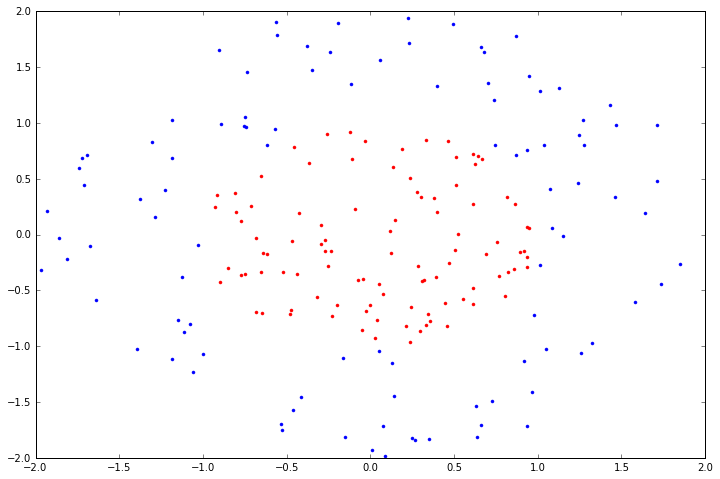

In [55]:
plt.plot(*traindata[:100,:].T,'r.')
plt.plot(*traindata[100:,:].T,'b.')

In [59]:
from sklearn.svm import SVC

In [ ]:
sigma=1
C=1000
#Train SVM with fixed sigma, 
clf = SVC(C=C,gamma=sigma)
clf.fit(traindata,trainclass)
# Classify test dat


In [33]:

SVM = svm_train(traindata,trainclass,sigma,C)

[predclass]=svm_classify(tstdata,SVM)
pct_correct=sum(tstclass==predclass)/length(tstclass)*10
plt.plot(traindata[:100,0],traindata[:100,1],'b.',traindata[100:,0],traindata[100:,1],'r.')
#sv=SVM.sv
#sv_index=SVM.index
#title(['Number of SV = ',int2str(length(sv)),',  Accuracy(%) = ',num2str(pct_correct)]

NameError: name 'data1data2' is not defined